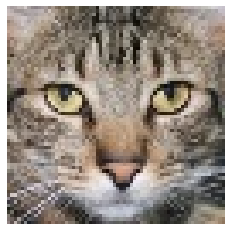

(<matplotlib.image.AxesImage at 0x7fa4801b1690>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [69]:
import imageio
from matplotlib import pyplot as plt
import numpy as np

im = imageio.imread('sample_cats.png')
img=im.astype(np.float).flatten()
plt.imshow(im), plt.axis('off'), plt.show()

In [70]:
import random
def drop_rect(img_in, hi=64, wi=64, chan=4, share=0.5, positioning="random", val=0.0):
    img = img_in.copy()
    rhi = np.int(hi*share)
    rwi = np.int(wi*share)
    xpos = random.randint(0, hi-rhi)
    ypos = random.randint(0, wi-rwi)
    xdim = xpos + rhi
    ydim = ypos + rwi
    img = img.reshape(hi,wi, chan)
    img[xpos:xdim,ypos:ydim,:] = np.ones((rhi, rwi, chan))*val
    return img

In [89]:
def rect(img, n_rect, share, hi=64, wi=64, chan=4, val=0.0):
    transf_data = np.zeros_like(img)
    for i in range(64):
        img = img.reshape(hi,wi,chan)
        transf_data = drop_rect(img, hi, wi, chan, share=share, val=val).flatten()
        for j in range(1,n_rect):
            img = transf_data.reshape(hi,wi,chan)
            transf_data = drop_rect(img, hi, wi, chan, share=share, val=val).flatten()
    return transf_data

In [90]:
#alphas = [0.0, 0.25, 0.5, 0.75]

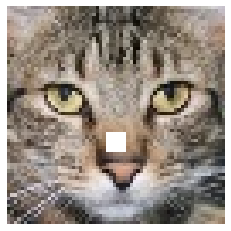

(<matplotlib.image.AxesImage at 0x7fa4b2a00bd0>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [91]:
img1=rect(img,n_rect=1, share=0.10).reshape(64,64,4).astype(int)
plt.imshow(img1), plt.axis('off'), plt.show()

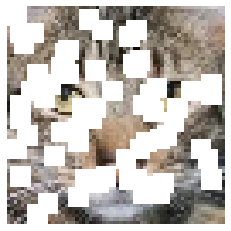

(<matplotlib.image.AxesImage at 0x7fa4c0602990>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [92]:
img2=rect(img,n_rect=2, share=0.10).reshape(64,64,4).astype(int)
plt.imshow(img2), plt.axis('off'), plt.show()

In [94]:
def apply_swirl(img, n_swirls, radius, strength, hi=64, wi=64, chan=4):
    transf_data = np.zeros_like(img)
    for i in range(64):
        img_in = img.reshape(hi,wi,chan)
        img = lokal_swirl(img_in, n_swirls, radius, strength, hi=64, wi=64, chan=4)
        transf_data = img.flatten()
    return transf_data

In [95]:
from skimage.transform import swirl
def lokal_swirl(img_in, n_swirls, radius, strength, hi=64, wi=64, chan=4, corr_size=3):
    img = img_in.copy()
    size = corr_size
    for i in range(n_swirls):
        sign = np.sign(np.random.rand(1) - 0.5)[0]

        xpos = hi // 2
        ypos = wi // 2
        center = (xpos,ypos)
        img = swirl(img, rotation=0, strength=sign*strength, radius=radius, center=center)
        img[0:size] = img_in[0:size]
        img[-(size+1):] = img_in[-(size+1):]
        img[:,0:size] = img_in[:,0:size]
        img[:,-(size+1):] = img_in[:,-(size+1):]
    return img

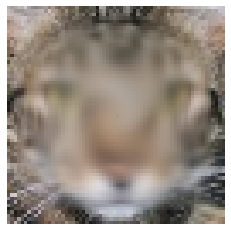

(<matplotlib.image.AxesImage at 0x7fa4b32e79d0>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [106]:
#alphas = [0.0, 1.0, 2.0, 4.0]
img3=apply_swirl(img,n_swirls=1,radius=30,strength=0.5).reshape(64,64,4).astype(int)
plt.imshow(img3), plt.axis('off'), plt.show()

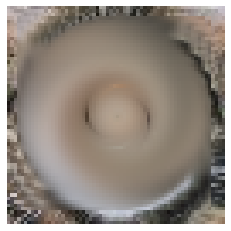

(<matplotlib.image.AxesImage at 0x7fa4c079a650>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [102]:
img4=apply_swirl(img,n_swirls=1,radius=70,strength=4.0).reshape(64,64,4).astype(int)
plt.imshow(img4), plt.axis('off'), plt.show()